**Beta Cell Metabolism: Tabula Muris Senis**

The *Beta cell Metabolism* project focuses on mining databases related to mouse/human single cell RNAseq and single proteomic and metabolomic data. The goal is to mine different databases to gain novel insights into multiple projects about the pancreatic beta cell differentiation, metabolism and insulin secretion. 

This project **Clustering Beta Cells from Tabula Muris Senis** focuses on creation of a beta-cell subset from a dataset consisting of the pancreatic cells by using various scanpy functions related to data preprocessing, scaling , normalisation, visualisation, clustering and statistical testing.
<br>

**Insights into the dataset:**

The chosen dataset is taken from the Tabula Muris Senis paper
<br>(https://www.nature.com/articles/s41586-020-2496-1?WT.ec_id=NATURE-202007&sap-outbound-id=E5D153BE4BE584690401C0DF4C15807ADAE6C8BE) 
<br>
(https://figshare.com/articles/dataset/Tabula_Muris_Senis_Data_Objects/12654728). 
<br>It consists of the Pancreatic Datasets obtained from the FACS(fluorescence-activated cell sorting) as well as the Droplet (microfluidic droplet method) Method. FACS and Droplet are the two methods for cell sorting. The data structure used is known as the AnnData which basically stands for "annotated data," and is the standard format used by the analysis library, Scanpy. 



**IMPORTING LIBRARIES**

In [ ]:
from google.colab import drive #mount the drive to access the files 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#installing the libaries 
!pip install scanpy 
!pip install jgraph

In [ ]:
#importing the libaries required 

import pandas as pd #load in the pandas library for working with dataframes
import seaborn as sns #load in the python data visualization library 
import numpy as np #load in the numerical python library 
import scanpy as sc #load in the single-cell analysis library
import matplotlib.pyplot as plt #load in the visualisations
from jgraph import * #load in the graphs

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

#These are the file paths from where the dataset will be accessed which can be modified as per user needs
FACS = sc.read_h5ad('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/Pancreas_Facs.h5ad') 
Droplet = sc.read_h5ad('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/Pancreas_Droplet.h5ad')

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.0.0
anndata             0.7.4
bottleneck          1.3.2
certifi             2020.06.20
cffi                1.14.2
chardet             3.0.4
cloudpickle         1.3.0
cvxopt              1.2.5
cycler              0.10.0
cython_runtime      NA
dask                2.12.0
dataclasses         NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
gi                  3.26.1
gio                 NA
glib                NA
gobject             NA
google              NA
gtk                 NA
h5py                2.10.0
idna                2.10
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           4.10.1
ipython_genutils    0.2.0
ipywidgets          7.5.1
jgraph              0.2.1
jinja2              2.11.2
joblib              0.16.0
jsonschema          2.6.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.31.0
markupsafe

/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


We are going to combine the FACS and Droplet datasets to form a new dataset called *combined* which will consists of all the pancreatic cells derieved from these two methods in order to further create a subset for only beta cells to find the important marker genes

In [ ]:
FACS #To inspect general info about the object FACS

AnnData object with n_obs × n_vars = 3384 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

The FACS data contains the following
<br>
There are 3384 observations which are the number of cells (n_obs)
<br>
There are 22966 variables which denotes the genes (n_var)

In [ ]:
Droplet #To inspect general info about the object

AnnData object with n_obs × n_vars = 6201 × 20138
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

The FACS data contains the following

There are 6201 observations which are the number of cells (n_obs)
<br>
There are 20138 variables which denotes the genes (n_var)

In [ ]:
FACS.obs #To inspect the key-indexed observations annotation (obs)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3212,978772.0,1,15
A11_B000756_B007446_S11.mm10-plus-0-0,Viable,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2544,666994.0,1,10
A12_B000756_B007446_S12.mm10-plus-0-0,Viable,18m,A12_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,3789,1783484.0,3,7
A13_B000756_B007446_S13.mm10-plus-0-0,Viable,18m,A13_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,4745,636498.0,0,8
A13_B002832_B007443_S13.mm10-plus-0-0,Viable,18m,A13_B002832,pancreatic acinar cell,nan,pancreatic acinar cell,facs,18_47_F,female,Exocrine,Pancreas,1050,250130.0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8.MAA000910.3_10_M.1.1-1-1,nan,3m,P8.MAA000910.3_10_M.1.1,pancreatic acinar cell,CL:0002064,pancreatic acinar cell,facs,3_10_M,male,Exocrine,Pancreas,1797,370099.0,9,14
P8.MAA001857.3_38_F.1.1-1-1,nan,3m,P8.MAA001857.3_38_F.1.1,pancreatic A cell,CL:0000171,nan,facs,3_38_F,female,Endocrine,Pancreas,5926,1539446.0,0,0
P9.MAA000574.3_8_M.1.1-1-1,nan,3m,P9.MAA000574.3_8_M.1.1,pancreatic acinar cell,CL:0002064,pancreatic acinar cell,facs,3_8_M,male,Exocrine,Pancreas,604,311408.0,7,6


The above table for FACS dataset denotes the annotations of the variables, i.e. the genes. The files has 15 columns: FACS.selection,	age, cell, cell_ontology_class, cell_ontology_id,	free_annotation,	method,	mouse.id,	sex,	subtissue,	tissue,	n_genes,	n_counts,	louvain,	leiden

In [ ]:
FACS.obs.drop(labels='FACS.selection', axis= 1, inplace=True) #Since we have to combine the FACS and Droplet Dataset, we will drop the columns which are not the same in both the datasets. 
#Here we will drop the column 'FACS.selection'

In [ ]:
FACS.obs #To inspect the key-indexed observations annotation (obs) after dropping the dissimiliar column

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3212,978772.0,1,15
A11_B000756_B007446_S11.mm10-plus-0-0,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2544,666994.0,1,10
A12_B000756_B007446_S12.mm10-plus-0-0,18m,A12_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,3789,1783484.0,3,7
A13_B000756_B007446_S13.mm10-plus-0-0,18m,A13_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,4745,636498.0,0,8
A13_B002832_B007443_S13.mm10-plus-0-0,18m,A13_B002832,pancreatic acinar cell,nan,pancreatic acinar cell,facs,18_47_F,female,Exocrine,Pancreas,1050,250130.0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8.MAA000910.3_10_M.1.1-1-1,3m,P8.MAA000910.3_10_M.1.1,pancreatic acinar cell,CL:0002064,pancreatic acinar cell,facs,3_10_M,male,Exocrine,Pancreas,1797,370099.0,9,14
P8.MAA001857.3_38_F.1.1-1-1,3m,P8.MAA001857.3_38_F.1.1,pancreatic A cell,CL:0000171,nan,facs,3_38_F,female,Endocrine,Pancreas,5926,1539446.0,0,0
P9.MAA000574.3_8_M.1.1-1-1,3m,P9.MAA000574.3_8_M.1.1,pancreatic acinar cell,CL:0002064,pancreatic acinar cell,facs,3_8_M,male,Exocrine,Pancreas,604,311408.0,7,6


The above table for FACS dataset denotes the annotations of the variables, i.e. the genes. The files has 14 columns: age,	cell,	cell_ontology_class,	cell_ontology_id,	free_annotation,	method,	mouse.id,	sex,	subtissue,	tissue,	n_genes,	n_counts,	louvain,	leiden

In [ ]:
Droplet.obs  #To inspect the key-indexed observations annotation (obs)

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACCTGGTCACAAGG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACCTGGTCAC...,pancreatic B cell,NA,pancreatic B cell,droplet,18-F-50,1428.0,female,Endocrine,Pancreas,Pancreas,5085.0,4,0
AAACGGGCAGTGGGAT-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACGGGCAGTG...,endothelial cell,NA,endothelial cell,droplet,18-F-50,2386.0,female,Endocrine,Pancreas,Pancreas,5990.0,15,16
AAACGGGTCAGTCAGT-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACGGGTCAGT...,pancreatic D cell,NA,pancreatic D cell,droplet,18-F-50,1498.0,female,Endocrine,Pancreas,Pancreas,3893.0,5,7
AAAGATGAGGGAACGG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAAGATGAGGGA...,pancreatic B cell,NA,pancreatic B cell,droplet,18-F-50,1578.0,female,Endocrine,Pancreas,Pancreas,7909.0,1,1
AAAGATGTCTGTCTCG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAAGATGTCTGT...,pancreatic B cell,NA,nan,droplet,18-F-50,783.0,female,Endocrine,Pancreas,Pancreas,2801.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTAGTCAAGCG-1-34-1-0,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1417.0,male,PANCREAS,Pancreas,Pancreas,6162.0,4,0
TTGCCGTTCTTACCGC-1-34-1-0,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1763.0,male,PANCREAS,Pancreas,Pancreas,5800.0,0,8
TTTCCTCAGCTGCCCA-1-34-1-0,30m,10X_P3_1_TTTCCTCAGCTGCCCA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1323.0,male,PANCREAS,Pancreas,Pancreas,3148.0,0,1


The above table for Droplet dataset denotes the annotations of the variables, i.e. the genes. The files has 15 columns: age,	cell,	cell_ontology_class,	cell_ontology_id,	free_annotation,	method,	mouse.id,	n_genes,	sex,	subtissue,	tissue,	tissue_free_annotation,	n_counts,	louvain, leiden

In [ ]:
Droplet.obs.drop(labels='tissue_free_annotation', axis= 1, inplace=True) #Since we have to combine the FACS and Droplet Dataset, we will drop the columns which are not the same in both the datasets. 
#Here we will drop the column 'tissue_free_annotation'

In [ ]:
Droplet.obs #To inspect the key-indexed observations annotation (obs) after dropping a dissimiliar column

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,n_counts,louvain,leiden
index,,,,,,,,,,,,,,
AAACCTGGTCACAAGG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACCTGGTCAC...,pancreatic B cell,NA,pancreatic B cell,droplet,18-F-50,1428.0,female,Endocrine,Pancreas,5085.0,4,0
AAACGGGCAGTGGGAT-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACGGGCAGTG...,endothelial cell,NA,endothelial cell,droplet,18-F-50,2386.0,female,Endocrine,Pancreas,5990.0,15,16
AAACGGGTCAGTCAGT-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAACGGGTCAGT...,pancreatic D cell,NA,pancreatic D cell,droplet,18-F-50,1498.0,female,Endocrine,Pancreas,3893.0,5,7
AAAGATGAGGGAACGG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAAGATGAGGGA...,pancreatic B cell,NA,pancreatic B cell,droplet,18-F-50,1578.0,female,Endocrine,Pancreas,7909.0,1,1
AAAGATGTCTGTCTCG-1-16-0-0,18m,MACA_18m_F_PANCREASE_ENDOCRINE_50_AAAGATGTCTGT...,pancreatic B cell,NA,nan,droplet,18-F-50,783.0,female,Endocrine,Pancreas,2801.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTAGTCAAGCG-1-34-1-0,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1417.0,male,PANCREAS,Pancreas,6162.0,4,0
TTGCCGTTCTTACCGC-1-34-1-0,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1763.0,male,PANCREAS,Pancreas,5800.0,0,8
TTTCCTCAGCTGCCCA-1-34-1-0,30m,10X_P3_1_TTTCCTCAGCTGCCCA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,1323.0,male,PANCREAS,Pancreas,3148.0,0,1


The above table for Droplet dataset denotes the annotations of the variables, i.e. the genes. The files has 15 columns: age,	cell,	cell_ontology_class,	cell_ontology_id,	free_annotation,	method,	mouse.id,	n_genes,	sex,	subtissue,	tissue,	n_counts,	louvain, leiden

In [ ]:
combined = FACS.concatenate(Droplet, join='outer', batch_categories=['FACS', 'Droplet'],index_unique='-') #To combine the new FACS and Droplet dataset using the function concatenate

In [ ]:
combined #To inspect general info about the new object combined

AnnData object with n_obs × n_vars = 9585 × 22988
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

The new dataset created called combined data contains the following
<br>
There are 9585 observations which are the number of cells (n_obs)
<br>
There are 22988 variables which denotes the genes (n_var)

In [ ]:
combined.obs #To inspect the key-indexed observations annotation (obs) of the new dataset

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden,batch
index,,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0-FACS,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3212.0,978772.0,1,15,FACS
A11_B000756_B007446_S11.mm10-plus-0-0-FACS,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2544.0,666994.0,1,10,FACS
A12_B000756_B007446_S12.mm10-plus-0-0-FACS,18m,A12_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,3789.0,1783484.0,3,7,FACS
A13_B000756_B007446_S13.mm10-plus-0-0-FACS,18m,A13_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,4745.0,636498.0,0,8,FACS
A13_B002832_B007443_S13.mm10-plus-0-0-FACS,18m,A13_B002832,pancreatic acinar cell,nan,pancreatic acinar cell,facs,18_47_F,female,Exocrine,Pancreas,1050.0,250130.0,5,9,FACS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTAGTCAAGCG-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1417.0,6162.0,4,0,Droplet
TTGCCGTTCTTACCGC-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1763.0,5800.0,0,8,Droplet
TTTCCTCAGCTGCCCA-1-34-1-0-Droplet,30m,10X_P3_1_TTTCCTCAGCTGCCCA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1323.0,3148.0,0,1,Droplet


The above table for combined dataset denotes the annotations of the variables, i.e. the genes. The files has 15 columns: age,	cell,	cell_ontology_class,	cell_ontology_id,	free_annotation,	method,	mouse.id, sex,	subtissue,	tissue,	n_genes,	n_counts,	louvain,	leiden,	batch

In [ ]:
combined.obs.isnull().sum() #To check if there are any null values in the dataset

age                    0
cell                   0
cell_ontology_class    0
cell_ontology_id       0
free_annotation        0
method                 0
mouse.id               0
sex                    0
subtissue              0
tissue                 0
n_genes                0
n_counts               0
louvain                0
leiden                 0
batch                  0
dtype: int64

**BASIC PREPROCESSING** 
<br>
Since our dataset consists of many poor quality cells and has batch effects from random genes. We will process the data in the following way
 
 Preprocessing consists of the following:
 <br>
 1)Filtering of low-quality cells 
 <br>
 2)Quality control
 <br>
 3)Normalization 
<br>
4)Selection of features
<br>
5)Scaling the data
<br>
6)Dimensionality reduction

**Filtering of low-quality cells**
<br>
We will be performing the standard filteration before the calcluating the quality metrics

In [ ]:
sc.pp.filter_genes(combined, min_cells=5)  #This function removes the genes based on the number of cells or counts (here number is set to 5)
sc.pp.filter_cells(combined, min_genes=500)#This function removes the cell outliers based on counts and numbers of genes expressed  (here number is set to 500)

filtered out 4659 genes that are detected in less than 5 cells
filtered out 1934 cells that have less than 500 genes expressed


The dataset contains alot of non-biological factors which can get expressed instead of the important genes and hence give inaccurate results and hence the below code is to remove the spike-ins called 'ERCC' from the combined.var which denotes the variables (gene)

In [ ]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in combined.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
combined.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  0


In [ ]:
combined

AnnData object with n_obs × n_vars = 7651 × 18329
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

There are 7651 cells and 18329 genes

**Quality Control**
<br>
Quality control (QC) is performed to look for the cells which are outliers with respect to the rest of the cells present in the dataset instead of comparing independent quality standards. Lets filter out the cells and genes after computing quality metrics

In [ ]:
combined.var['ERCC'] = combined.var_names.str.startswith('ERCC-')  #annotating the group of ERCC genes as 'ERCC-'
sc.pp.calculate_qc_metrics(combined, qc_vars=['ERCC'], percent_top=None, log1p=False, inplace=True) #To calculate quality control metrics
#this returns a table of number of cells and number of genes 

The processed combined data contains the following
<br>
There are 7651 observations which are the number of cells (n_obs)
<br>
There are 18329 variables which denotes the genes (n_var)

In [ ]:
combined.var #To inspect the Key-indexed annotation of variables/features (var) of the combined dataset created 

,n_cells-Droplet,means-Droplet,dispersions-Droplet,dispersions_norm-Droplet,highly_variable-Droplet,n_cells-FACS,means-FACS,dispersions-FACS,dispersions_norm-FACS,highly_variable-FACS,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,,,,,,,,,,,
0610005C13Rik,11813.0,0.004636,0.832166,0.090973,False,3939.0,0.002704,0.276822,-0.176050,False,72,False,71,0.037176,99.072017,284.433350
0610007C21Rik,131072.0,0.592218,0.845373,-0.446199,False,61891.0,0.977686,1.065311,-0.800118,False,4607,False,4501,1.010816,41.171089,7733.756836
0610007L01Rik,76760.0,0.489041,0.878992,-0.384752,False,36115.0,0.623433,1.104364,-0.424289,False,3931,False,3845,0.800220,49.745131,6122.484375
0610007N19Rik,47468.0,0.293003,1.423106,1.205508,True,19591.0,0.158524,1.297194,0.416103,False,1868,False,1679,0.383261,78.055156,2932.327148
0610007P08Rik,17839.0,0.130930,0.800942,0.032084,False,12581.0,0.155475,0.864050,0.164737,False,1427,False,1423,0.386343,81.401124,2955.907227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,128613.0,0.078646,0.908146,0.234275,False,58021.0,0.205884,1.455814,0.508156,True,1193,False,1180,0.305525,84.577179,2337.571533
Zzef1,37470.0,0.275182,0.881459,0.183942,False,26577.0,0.416600,1.584131,0.168054,False,2606,False,2599,0.561146,66.030584,4293.328613
Zzz3,41389.0,0.207048,0.796231,0.023198,False,23403.0,0.288653,1.180151,0.348180,False,2249,False,2239,0.501821,70.735852,3839.429443


The above table for combined dataset denotes the annotations of the variables, i.e. the genes. The files now has 16 columns: n_cells-Droplet,	means-Droplet,	dispersions-Droplet,	dispersions_norm-Droplet,	highly_variable-Droplet,	n_cells-FACS,	means-FACS,	dispersions-FACS,	dispersions_norm-FACS,	highly_variable-FACS,	n_cells,	ERCC,	n_cells_by_counts, mean_counts,	pct_dropout_by_counts,	total_counts

... storing 'age' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'cell_ontology_id' as categorical
... storing 'free_annotation' as categorical
... storing 'method' as categorical
... storing 'mouse.id' as categorical
... storing 'subtissue' as categorical
... storing 'louvain' as categorical
... storing 'leiden' as categorical
... storing 'highly_variable-Droplet' as categorical
... storing 'highly_variable-FACS' as categorical


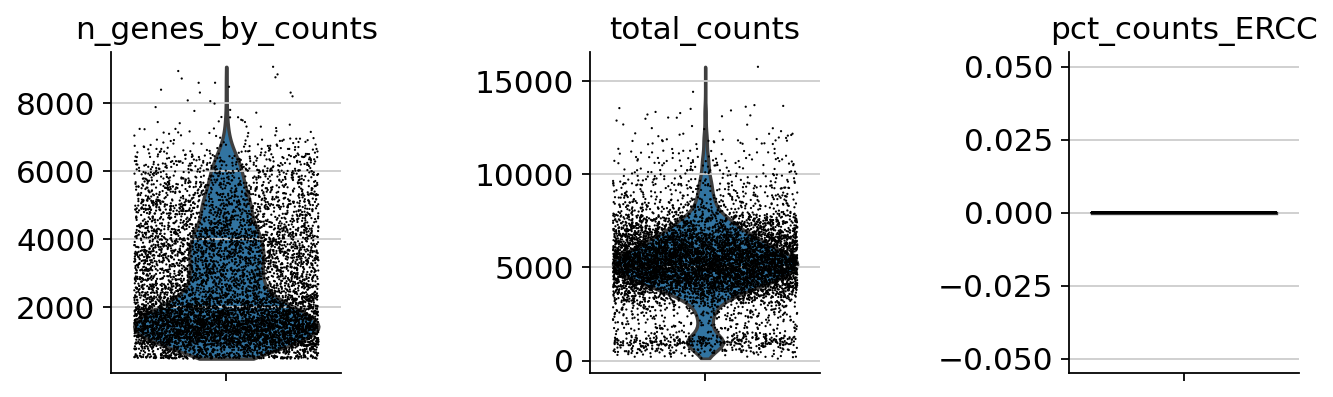

In [ ]:
sc.pl.violin(combined, ['n_genes_by_counts', 'total_counts','pct_counts_ERCC'],
             jitter=0.4, multi_panel=True) #Plotted violin plot for the the quality metrics [n_genes_by_counts, total_counts, pct_counts_ERCC]

The violin plot n_genes_by_count shows that the number of genes expressed in the cell count matrix. The genes are concentrated in the range of 0-8000
<br>
The violin plot total_count shows the total counts per cell which lies in the range of 0-15000 
<br>
The violin plot pct_counts_ERCC shows the total number of counts in ERCC genes which shows 0 which depicts ERCC isnt there

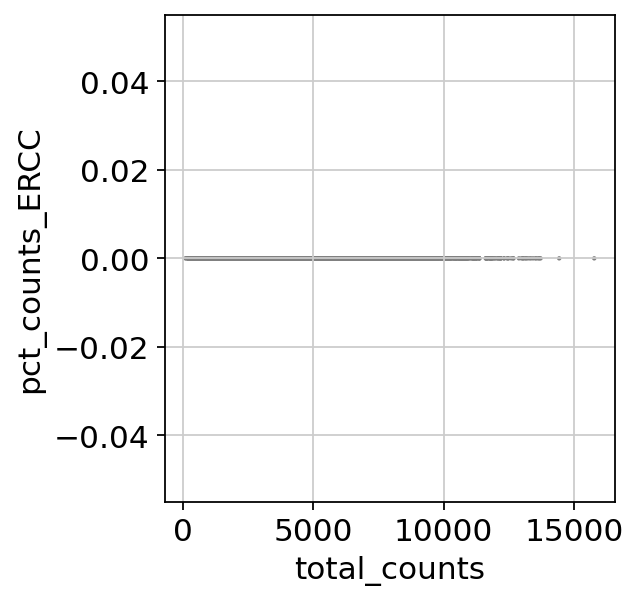

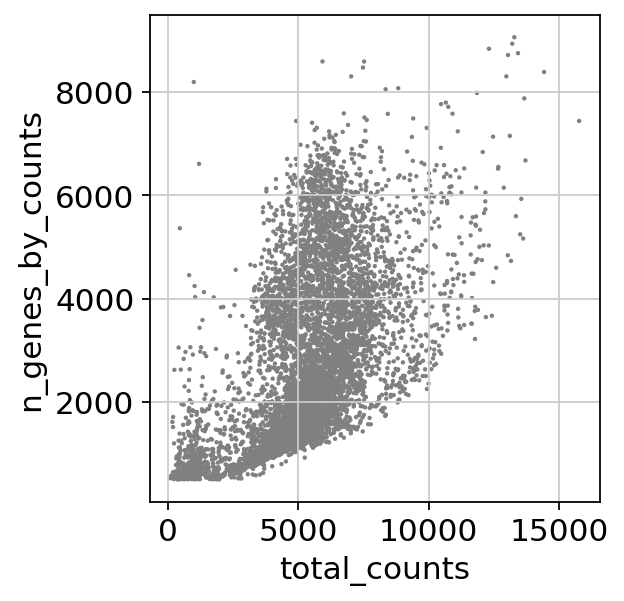

In [ ]:
sc.pl.scatter(combined, x='total_counts', y='pct_counts_ERCC') #Plotting a scatter plot for total_counts vs pct_counts_ERCC
sc.pl.scatter(combined, x='total_counts', y='n_genes_by_counts') #Plotting a scatter plot for total_counts vs n_genes_by_counts

**Filtering**

In [ ]:
#removing the cells in which number of genes per cell has a count of less than 8000 genes per cell
combined_filtered = combined[combined.obs.n_genes_by_counts < 8000, :] #creation of the filtered dataset

In [ ]:
combined_filtered #To inspect general info about the filtered object combined

View of AnnData object with n_obs × n_vars = 7637 × 18329
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

The processed combined data contains the following
<br>
There are 7637 observations which are the number of cells (n_obs)
<br>
There are 18329 variables which denotes the genes (n_var)

In [ ]:
combined_filtered.obs #To inspect the key-indexed observations annotation (obs) of the filtered dataset

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden,batch,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
index,,,,,,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0-FACS,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3211,978772.0,1,15,FACS,3211,6794.678223,0.0,0.0
A11_B000756_B007446_S11.mm10-plus-0-0-FACS,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2543,666994.0,1,10,FACS,2543,5932.829590,0.0,0.0
A12_B000756_B007446_S12.mm10-plus-0-0-FACS,18m,A12_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,3789,1783484.0,3,7,FACS,3789,4498.940918,0.0,0.0
A13_B000756_B007446_S13.mm10-plus-0-0-FACS,18m,A13_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,4745,636498.0,0,8,FACS,4745,4713.142578,0.0,0.0
A13_B002832_B007443_S13.mm10-plus-0-0-FACS,18m,A13_B002832,pancreatic acinar cell,nan,pancreatic acinar cell,facs,18_47_F,female,Exocrine,Pancreas,1050,250130.0,5,9,FACS,1050,871.732910,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTAGTCAAGCG-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1417,6162.0,4,0,Droplet,1417,4038.769043,0.0,0.0
TTGCCGTTCTTACCGC-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1763,5800.0,0,8,Droplet,1763,5413.793945,0.0,0.0
TTTCCTCAGCTGCCCA-1-34-1-0-Droplet,30m,10X_P3_1_TTTCCTCAGCTGCCCA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1323,3148.0,0,1,Droplet,1323,5447.108887,0.0,0.0


In [ ]:
combined_filtered.write('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/combined_filtered.h5ad') #save the filtered file

**Normalisation**

In [ ]:
combined_filtered.obs #To inspect the key-indexed observations annotation (obs) of the filtered dataset

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden,batch,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
index,,,,,,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0-FACS,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3211,978772.0,1,15,FACS,3211,6794.678223,0.0,0.0
A11_B000756_B007446_S11.mm10-plus-0-0-FACS,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2543,666994.0,1,10,FACS,2543,5932.829590,0.0,0.0
A12_B000756_B007446_S12.mm10-plus-0-0-FACS,18m,A12_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,3789,1783484.0,3,7,FACS,3789,4498.940918,0.0,0.0
A13_B000756_B007446_S13.mm10-plus-0-0-FACS,18m,A13_B000756,pancreatic B cell,nan,nan,facs,18_45_M,male,Endocrine,Pancreas,4745,636498.0,0,8,FACS,4745,4713.142578,0.0,0.0
A13_B002832_B007443_S13.mm10-plus-0-0-FACS,18m,A13_B002832,pancreatic acinar cell,nan,pancreatic acinar cell,facs,18_47_F,female,Exocrine,Pancreas,1050,250130.0,5,9,FACS,1050,871.732910,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTAGTCAAGCG-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1417,6162.0,4,0,Droplet,1417,4038.769043,0.0,0.0
TTGCCGTTCTTACCGC-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1763,5800.0,0,8,Droplet,1763,5413.793945,0.0,0.0
TTTCCTCAGCTGCCCA-1-34-1-0-Droplet,30m,10X_P3_1_TTTCCTCAGCTGCCCA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1323,3148.0,0,1,Droplet,1323,5447.108887,0.0,0.0


In [ ]:
combined_filtered #To inspect general info about the filtered object combined_filtered

View of AnnData object with n_obs × n_vars = 7637 × 18329
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

The dataset as well contains an offending gene, Rn45s. Hence it is important to remove the offending gene

In [ ]:
not_Rn45s = combined_filtered.var.index != 'Rn45s' #Removing Rn45s as it is an offending gene
combined_normalize = combined_filtered[:, not_Rn45s] #creating a variable combined_normalize which does not contain the gene Rns45s

In [ ]:
combined_normalize.var #To inspect the Key-indexed annotation of variables/features (var) of the combined dataset created 

,n_cells-Droplet,means-Droplet,dispersions-Droplet,dispersions_norm-Droplet,highly_variable-Droplet,n_cells-FACS,means-FACS,dispersions-FACS,dispersions_norm-FACS,highly_variable-FACS,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,,,,,,,,,,,
0610005C13Rik,11813.0,0.004636,0.832166,0.090973,False,3939.0,0.002704,0.276822,-0.176050,False,72,False,71,0.037176,99.072017,284.433350
0610007C21Rik,131072.0,0.592218,0.845373,-0.446199,False,61891.0,0.977686,1.065311,-0.800118,False,4607,False,4501,1.010816,41.171089,7733.756836
0610007L01Rik,76760.0,0.489041,0.878992,-0.384752,False,36115.0,0.623433,1.104364,-0.424289,False,3931,False,3845,0.800220,49.745131,6122.484375
0610007N19Rik,47468.0,0.293003,1.423106,1.205508,True,19591.0,0.158524,1.297194,0.416103,False,1868,False,1679,0.383261,78.055156,2932.327148
0610007P08Rik,17839.0,0.130930,0.800942,0.032084,False,12581.0,0.155475,0.864050,0.164737,False,1427,False,1423,0.386343,81.401124,2955.907227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,128613.0,0.078646,0.908146,0.234275,False,58021.0,0.205884,1.455814,0.508156,True,1193,False,1180,0.305525,84.577179,2337.571533
Zzef1,37470.0,0.275182,0.881459,0.183942,False,26577.0,0.416600,1.584131,0.168054,False,2606,False,2599,0.561146,66.030584,4293.328613
Zzz3,41389.0,0.207048,0.796231,0.023198,False,23403.0,0.288653,1.180151,0.348180,False,2249,False,2239,0.501821,70.735852,3839.429443


The above table for combined dataset denotes the annotations of the variables, i.e. the genes. The files has 16 columns:n_cells-Droplet,	means-Droplet, 	dispersions-Droplet, 	dispersions_norm-Droplet, 	highly_variable-Droplet, 	n_cells-FACS, means-FACS, 	dispersions-FACS, 	dispersions_norm-FACS, 	highly_variable-FACS, 	n_cells	ERCC, n_cells_by_counts, 	mean_counts, 	pct_dropout_by_counts, 	total_counts

In [ ]:
combined_normalize #To inspect general info about the normalized object combined_normalize

View of AnnData object with n_obs × n_vars = 7637 × 18328
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

The processed combined data contains 
<br>
There are 7637 observations which are the number of cells (n_obs)
<br>
There are 18328 variables which denotes the genes (n_var)

In [ ]:
sc.pp.normalize_total(combined_normalize, target_sum=1e4) #Normalize counts per cell, reduce the dataset from X to 10,000 reads per cells so that counts become comparable to the cells.

normalizing counts per cell


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [ ]:
sc.pp.log1p(combined_normalize) #Logarithmize the dataset

In [ ]:
combined_normalize.write('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/combined_normalized.h5ad') #save the normalized file

**Creating a subset**
<br>
We will create a subset which contains only Pancreatic B cells

In [ ]:
combined_normalize = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/combined_normalized.h5ad') #read the normalized file

In [ ]:
combined_normalize #To inspect general info about the normalized object combined_normalize

AnnData object with n_obs × n_vars = 7637 × 18328
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
B = combined_normalize[combined_normalize.obs["free_annotation"] == "pancreatic B cell", :] #creating a subset which contains only pancreatic B cells
B.obs # To inspect the key-indexed observations annotation (obs) of the dataset which contains only Pancreatic B cells

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden,batch,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
index,,,,,,,,,,,,,,,,,,,
A10_B000756_B007446_S10.mm10-plus-0-0-FACS,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3211,978772.0,1,15,FACS,3211,6794.678223,0.0,0.0
A11_B000756_B007446_S11.mm10-plus-0-0-FACS,18m,A11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2543,666994.0,1,10,FACS,2543,5932.829590,0.0,0.0
A1_B000756_B007446_S1.mm10-plus-0-0-FACS,18m,A1_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2100,366613.0,1,10,FACS,2100,5086.136230,0.0,0.0
A20_B000756_B007446_S20.mm10-plus-0-0-FACS,18m,A20_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2484,615225.0,1,10,FACS,2484,5330.078125,0.0,0.0
B11_B000756_B007446_S35.mm10-plus-0-0-FACS,18m,B11_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,2673,1102249.0,1,10,FACS,2673,6028.958984,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGACTTAGGAGTTTA-1-34-1-0-Droplet,30m,10X_P3_1_TTGACTTAGGAGTTTA,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1483,3217.0,1,1,Droplet,1483,6196.159668,0.0,0.0
TTGCCGTAGTCAAGCG-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTAGTCAAGCG,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1417,6162.0,4,0,Droplet,1417,4038.769043,0.0,0.0
TTGCCGTTCTTACCGC-1-34-1-0-Droplet,30m,10X_P3_1_TTGCCGTTCTTACCGC,pancreatic B cell,NA,pancreatic B cell,droplet,30-M-5,male,PANCREAS,Pancreas,1763,5800.0,0,8,Droplet,1763,5413.793945,0.0,0.0


In [ ]:
B #To inspect general info about the subset object B

View of AnnData object with n_obs × n_vars = 2992 × 18328
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

The processed combined data contains the following:
<br>
There are 2992 observations which are the number of cells (n_obs)
<br>
There are 18328 variables which denotes the genes (n_var)

**Selection of the Features**
<br>
We will create a dataset which contains only the highly expressed genes

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


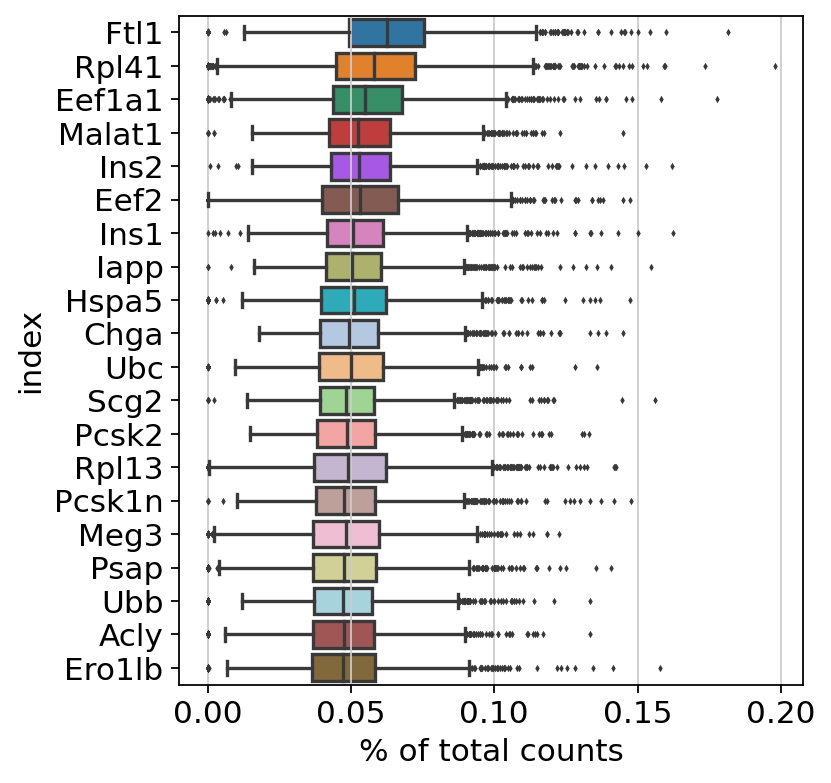

In [ ]:
sc.pl.highest_expr_genes(B, n_top=20, ) #Annotate highly variable genes 

The top three genes are Ftl1, Rpl41, Eef1a1

In [ ]:
sc.pp.highly_variable_genes(B, min_mean=0.0125, max_mean=3, min_disp=0.5) #identify the highly variable genes and we will keep the dataset which will contain only the highly variable genes 

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


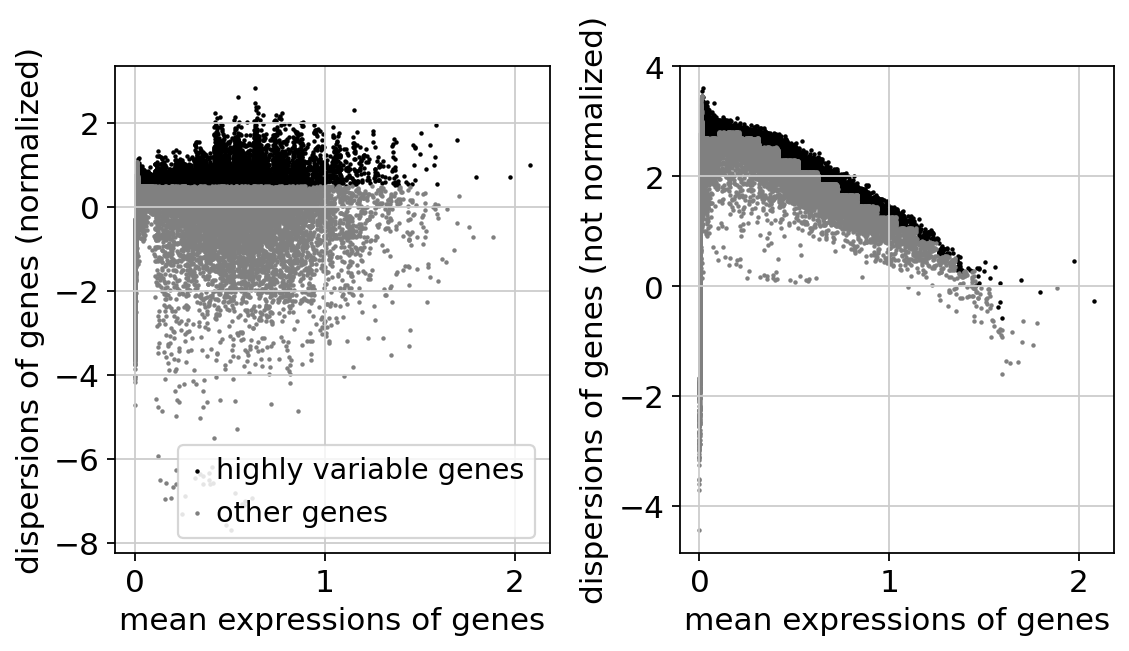

In [ ]:
sc.pl.highly_variable_genes(B) #scatter plot of the highly variable genes dataset

In [ ]:
B 

AnnData object with n_obs × n_vars = 2992 × 18328
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
B.raw = B

In [ ]:
B = B[:, B.var.highly_variable] #choosing highly variable genes

In [ ]:
B #To inspect general info about the normalized object B which has highly variable genes 

View of AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

Now the processed, normalised, highly variable gene beta subset contains 2992 observations which are the number of cells and 5530 variables which denotes the genes. We will scale the dataset to ensure that the highly expressed genes dont dominate

**Scaling of the data** 
we will scale our data to unit variance and zero mean

In [ ]:
B #To inspect general info about the normalized object B which has highly variable genes 

View of AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
sc.pp.regress_out(B, ['total_counts']) #To regress out effects of total counts per cell 

regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:21)


In [ ]:
sc.pp.scale(B, max_value=10) #Again scale the dataset to unit variance

Now we have B cells with only Highly variable genes *HVG after scaling

**DIMENSIONALITY REDUCTION**
<br>
Dimensionality reduction is a process which helps to identify similar transcriptomic profiles in which each gene represents a dimension of the data.  It takes a large set of variables and returns a smaller set of components which retains most of the information in the original dataset. 

**Principal Component Analysis**
<br>
Principal Component Analysis is a dimensionality reduction technique in which the correlated variables club into the uncorrelated variables called Principal Components (PCs)

In [ ]:
B #To inspect general info about the normalized object B which has highly variable genes

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
sc.tl.pca(B, svd_solver='arpack', n_comps=50) #To reduce the dimensionality of the dataset B by running PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


**Visualisation**

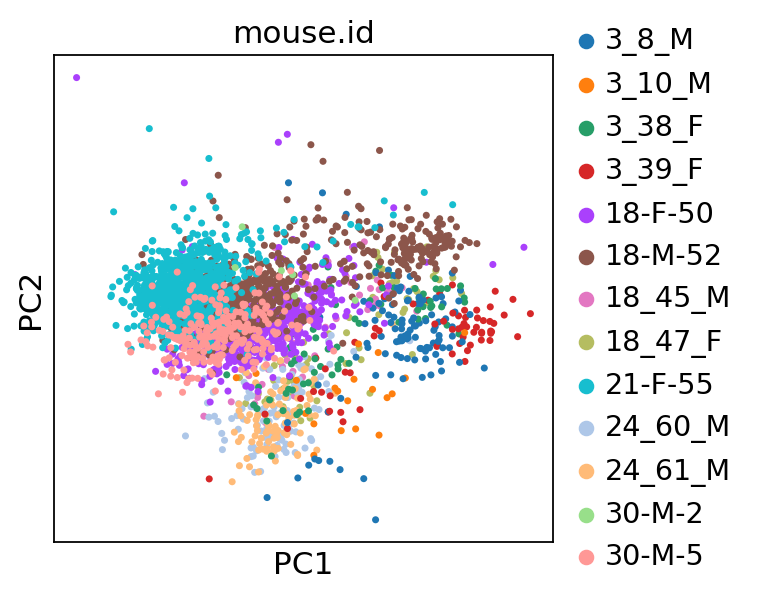

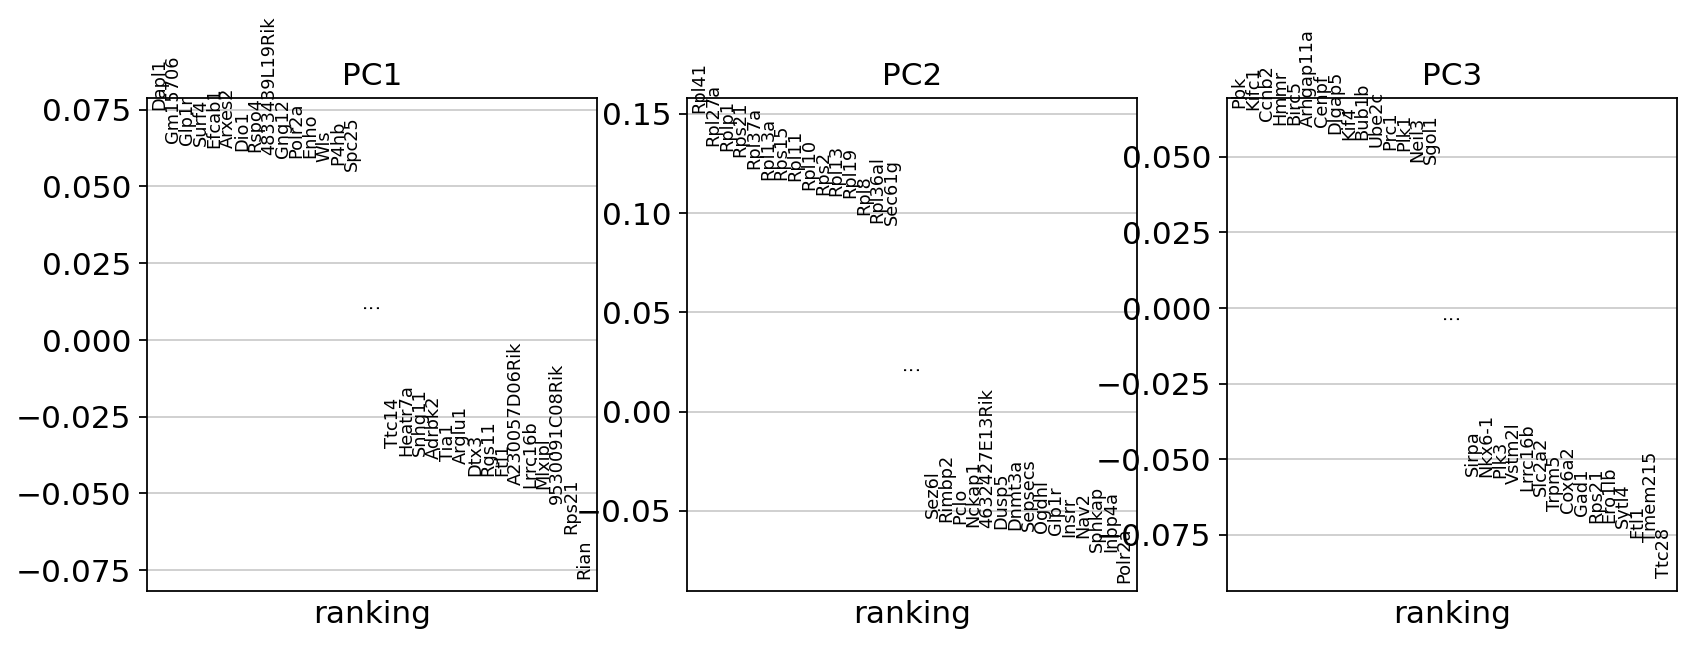

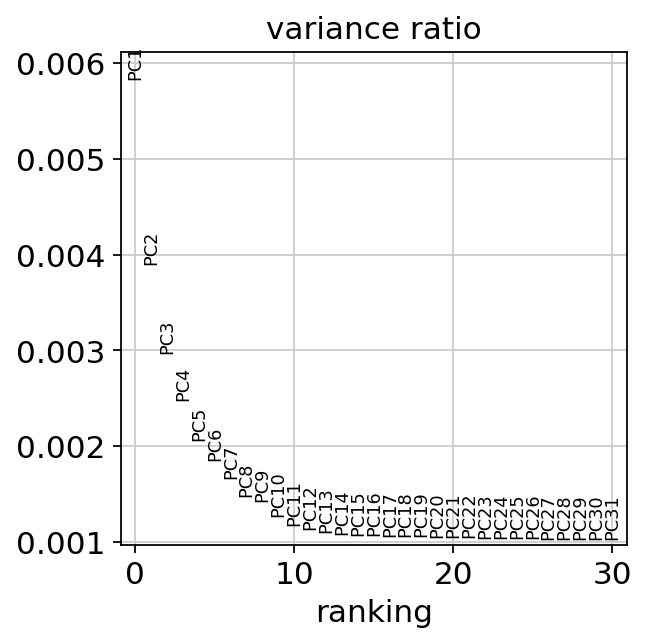

In [ ]:
sc.pl.pca_overview(B, color='mouse.id') #scatter plot of PC1 vs PC2 in mouse.id

PCA above depicts PC1 vs PC2 in mouse.id which denotes age of the mouse. The variance ratio graph shows explained variance of PCA dimensions

**Determination of the number of PCs to keep**

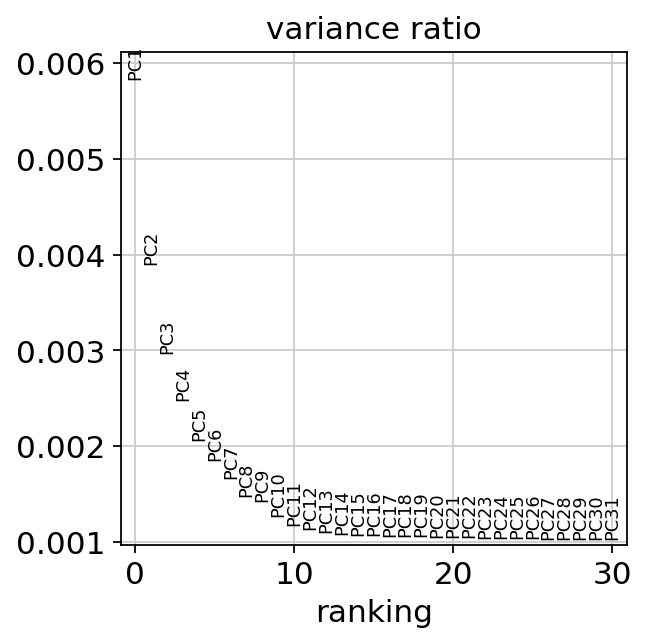

In [ ]:
sc.pl.pca_variance_ratio(B) #Determination of the number of PCs to keep

We will keep 5 PCs

In [ ]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_PCA.h5ad') #save the PCA file 

**CLUSTERING**

**CLUSTERING OF CELLS:**
<br>
To identify the cell types and states and as well as find differences between different groups, we group the cells in the process called clustering.  We can define the group of cells with similar expression profiles using unsupervised clustering.

In [ ]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_PCA.h5ad') #read the PCA file 

In [ ]:
B #To inspect general info about the normalized object B which has highly variable genes after PCA

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'mouse.id_colors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

The B subset after HVG after scaling and PCA

**Computation of the neighbourhood graph**

In [ ]:
sc.pp.neighbors(B, n_neighbors=10, n_pcs=10) #To compute the neighbours

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
B.uns #To inspect the unstructured annotation

OverloadedDict, wrapping:
	{'hvg': {'flavor': 'seurat'}, 'mouse.id_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896'], dtype=object), 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([25.284119 , 16.927717 , 12.8963375, 10.75229  ,  8.959068 ,
        8.056451 ,  7.22185  ,  6.42614  ,  6.2070546,  5.51641  ,
        5.0773063,  4.9061804,  4.7658086,  4.683906 ,  4.641309 ,
        4.635783 ,  4.6126647,  4.6101875,  4.592156 ,  4.5715237,
        4.5659957,  4.5446825,  4.529094 ,  4.5224705,  4.510052 ,
        4.502125 ,  4.480221 ,  4.472914 ,  4.4673243,  4.4608345,
        4.453829 ,  4.440482 ,  4.4375415,  4.432744 ,  4.4126215,
        4.409454 ,  4.394318 ,  4.3863363,  4.3800163,  4.374979 ,
        4.372338 ,  4.356474 ,  4.3496876,  4.3425407,  4.334846 ,
        4.3326945,  4.3295455,  4.3144336,  4.3120737,  4.2

**Visualisation of the neighbourhood graph**

In [ ]:
sc.tl.umap (B) #To compute the neighbourhood graph using UMAP

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [ ]:
B #creates X_umap Column

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'mouse.id_colors', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

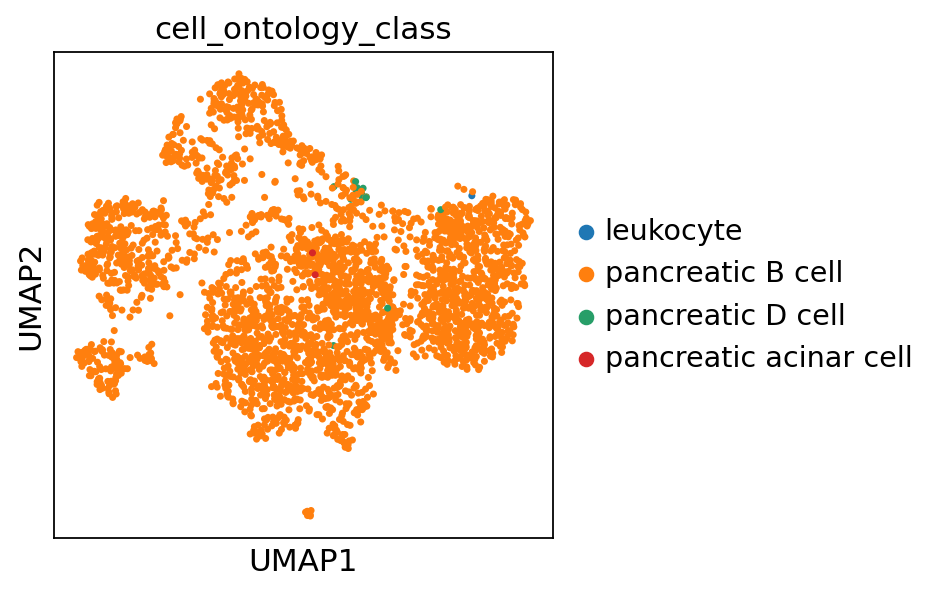

In [ ]:
sc.pl.umap(B, color=['cell_ontology_class']) #To plot the neighborhood graph so that we can place similiar cells together

We can see that the cell_ontology_class is mainly consists of the pancreatic B cells with the neighbouring cells such as leukocyte, pancreatic D cells, pancreatic acinar cells




**Clustering the neighbourhood graph**
<br>
Clustering of the neighbourhood graph by Leiden

In [ ]:
#installing and importing the library leiden for finding the clusters
!pip3 install leidenalg 
import leidenalg 

In [ ]:
  sc.tl.leiden(B, resolution=0.2) #To compute the clusters

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


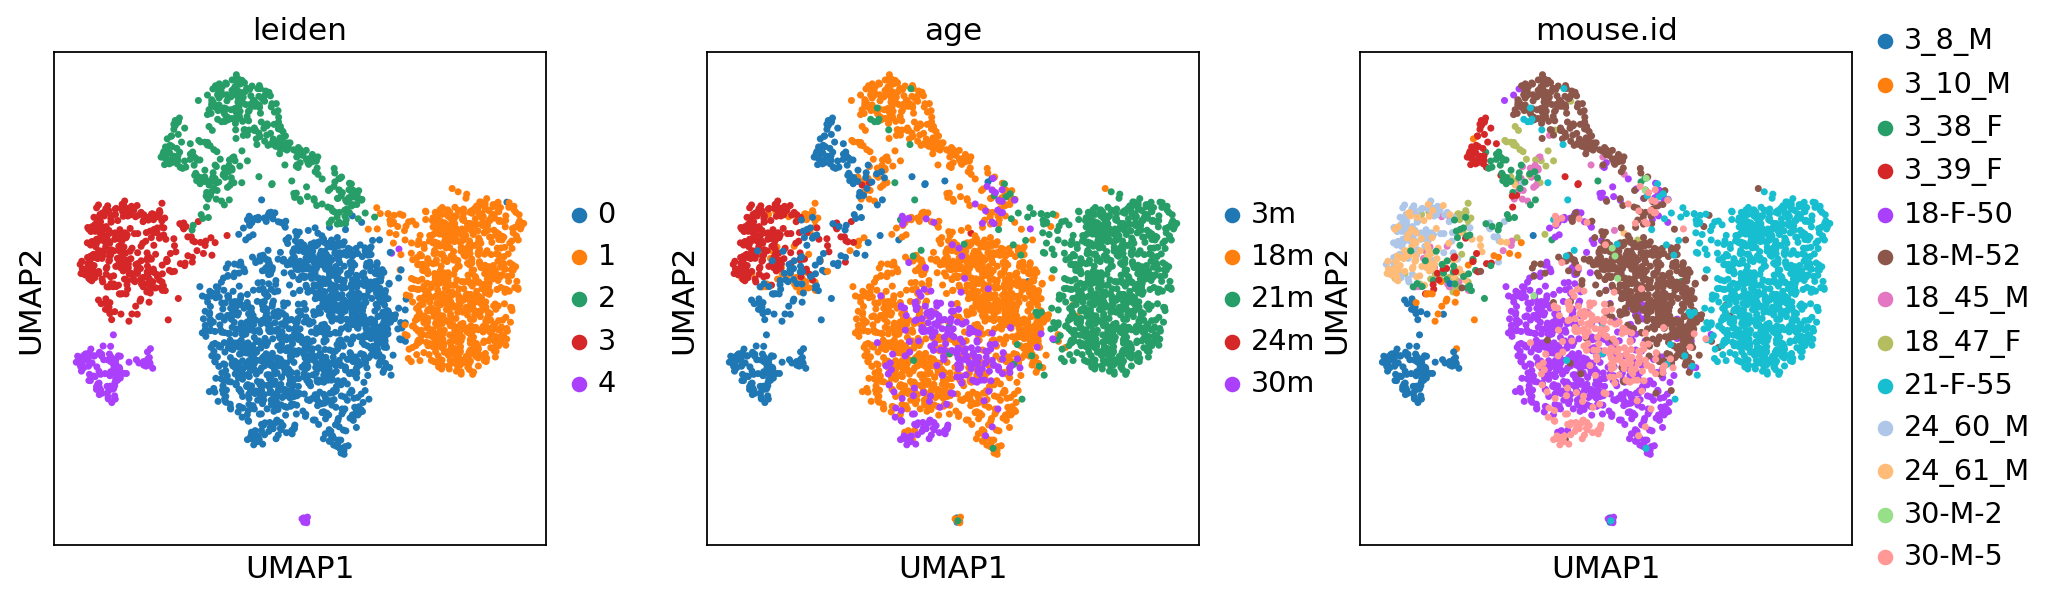

In [ ]:
sc.pl.umap(B, color=['leiden','age','mouse.id']) #to plot a UMAP of the age and mouse.id according to leiden clusters

The leiden clustering produces 5 clusters and the umap of ‘age’ shows the five different ages spread across five different clusters 

In [ ]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_Clustering.h5ad') #save the clustering file 

**FINDING MARKER GENES**

Wilcoxon Rank Sum Test 
<br> This test is used to find the marker genes 

In [ ]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_Clustering.h5ad') #read the clustering file 

In [ ]:
B

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'cell_ontology_class_colors', 'hvg', 'leiden', 'leiden_colors', 'mouse.id_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


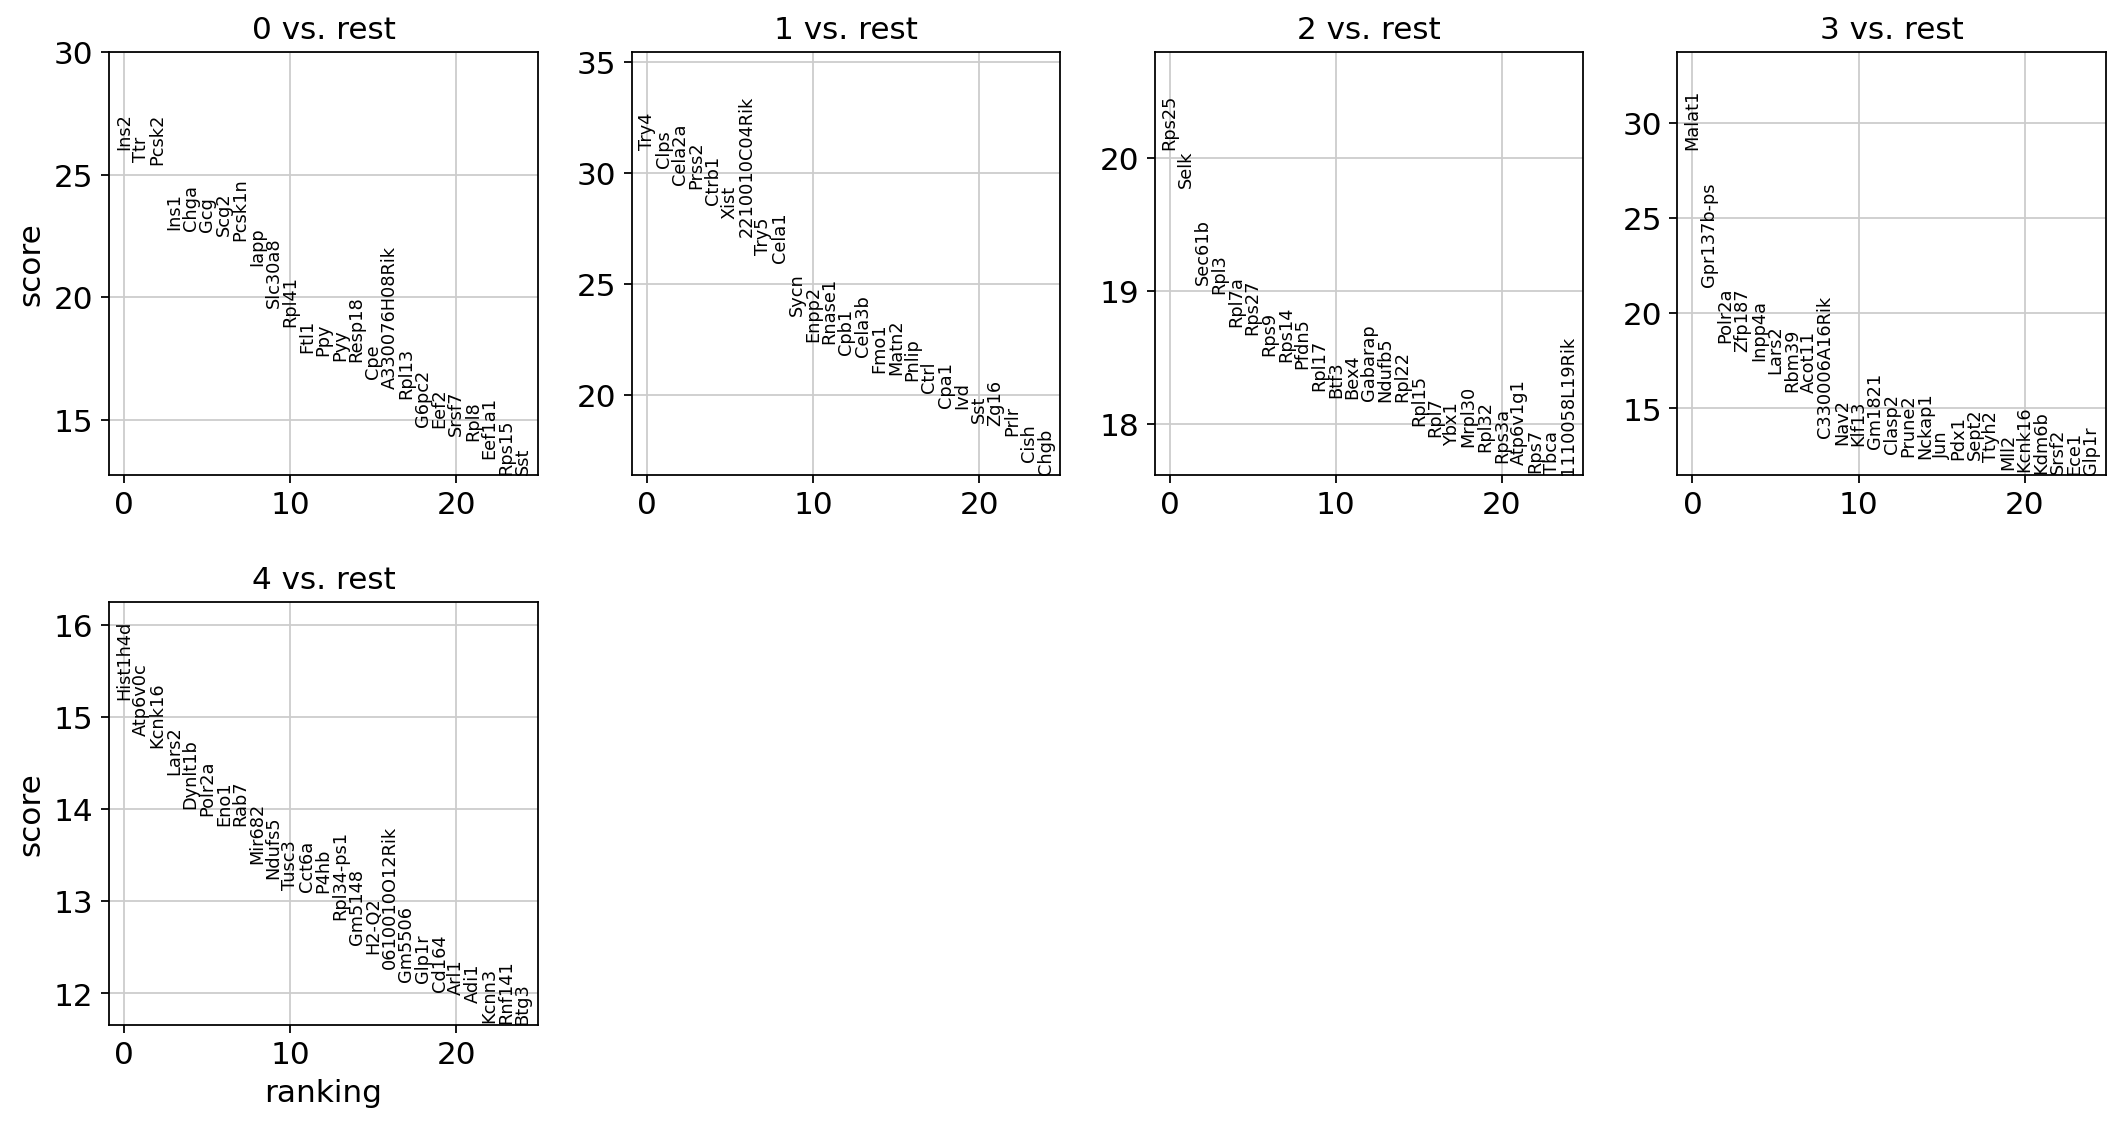

In [ ]:
sc.tl.rank_genes_groups( B ,'leiden', method='wilcoxon', bool = True, int=100) #find the marker genes using the method wilcoxon
sc.pl.rank_genes_groups(B, n_genes=25, sharey=False) #plot the marker genes 

In [ ]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_Wilcoxon.h5ad') #save the file containing the marker genes

In [ ]:
pd.DataFrame(B.uns['rank_genes_groups']['names']).head(5) #To view the first 5 rows of the dataframe of the marker genes 

,0,1,2,3,4
0,Ins2,Try4,Rps25,Malat1,Hist1h4d
1,Ttr,Clps,Selk,Gpr137b-ps,Atp6v0c
2,Pcsk2,Cela2a,Sec61b,Polr2a,Kcnk16
3,Ins1,Prss2,Rpl3,Zfp187,Lars2
4,Chga,Ctrb1,Rpl7a,Inpp4a,Dynlt1b


None of the top three expressed genes are found here

**Visualisation of expression of the marker genes**
<br>
<br>
The marker genes will be more expressed in the clusters for which they are markers and we can see that through visualising them

In [ ]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Tabula Muris Senis New/B_Wilcoxon.h5ad') #read the file containing the marker genes

In [ ]:
B #To inspect general info about the normalized object B which has highly variable genes after PCA, UMAP, Leiden clustering, marker genes with wilcoxon

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'cell_ontology_class_colors', 'hvg', 'leiden', 'leiden_colors', 'mouse.id_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

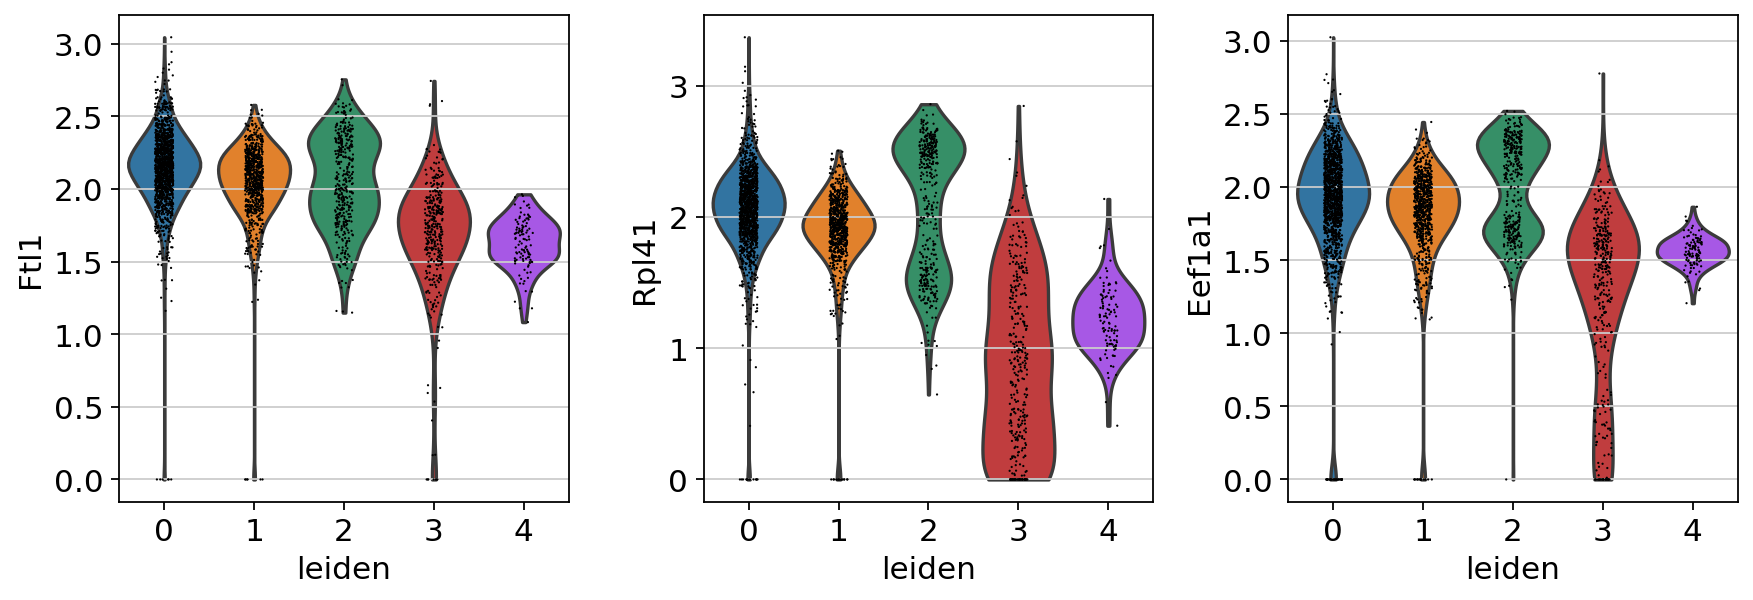

In [ ]:
sc.pl.violin(B, ['Ftl1', 'Rpl41', 'Eef1a1'], groupby='leiden') #To plot the expression of the highly expressed genes in different clusters

Ftl1 is more expressed in cluster 0,1,2
<br>
Rpl41 is more expressed in cluster 0 and 2
<br>
Eef1a1 is more expressed in cluster 0,1,2

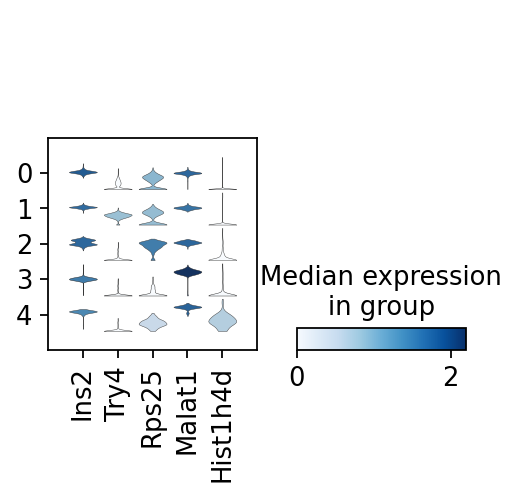

In [ ]:
sc.pl.stacked_violin(B, var_names =['Ins2', 'Try4',	'Rps25',	'Malat1',	'Hist1h4d'], groupby='leiden', rotation=90); #taking the marker genes from wilcoxon test and plotting against the clusters

We can see that these genes are highly expressed in cluster number:

Ins2 - 2

Try4 - 1

Rps25 - 2

Malat1 - 3

Hist1h4d - 4

Expression of the top 20 markers genes in cells for each cluster

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


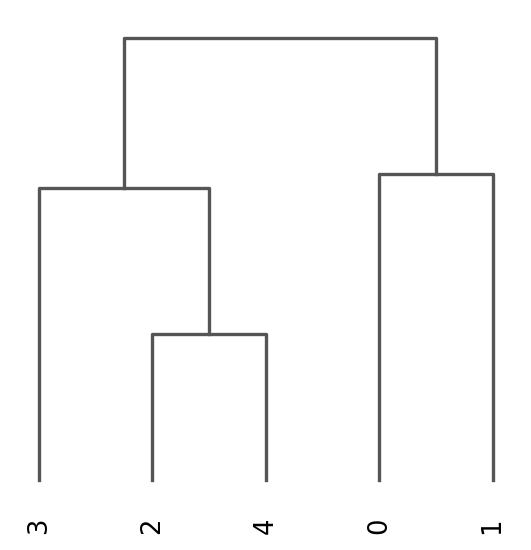

In [ ]:
#computing the dendrogram to which clusters are similiar
sc.tl.dendrogram (B,'leiden', n_pcs=50) 
sc.pl.dendrogram(B, 'leiden', show =True)

Cluster number 2 and 4 are related which is related to cluster number 3. Cluster number 0 and 1 are related which is related to 3 and 2 and 4


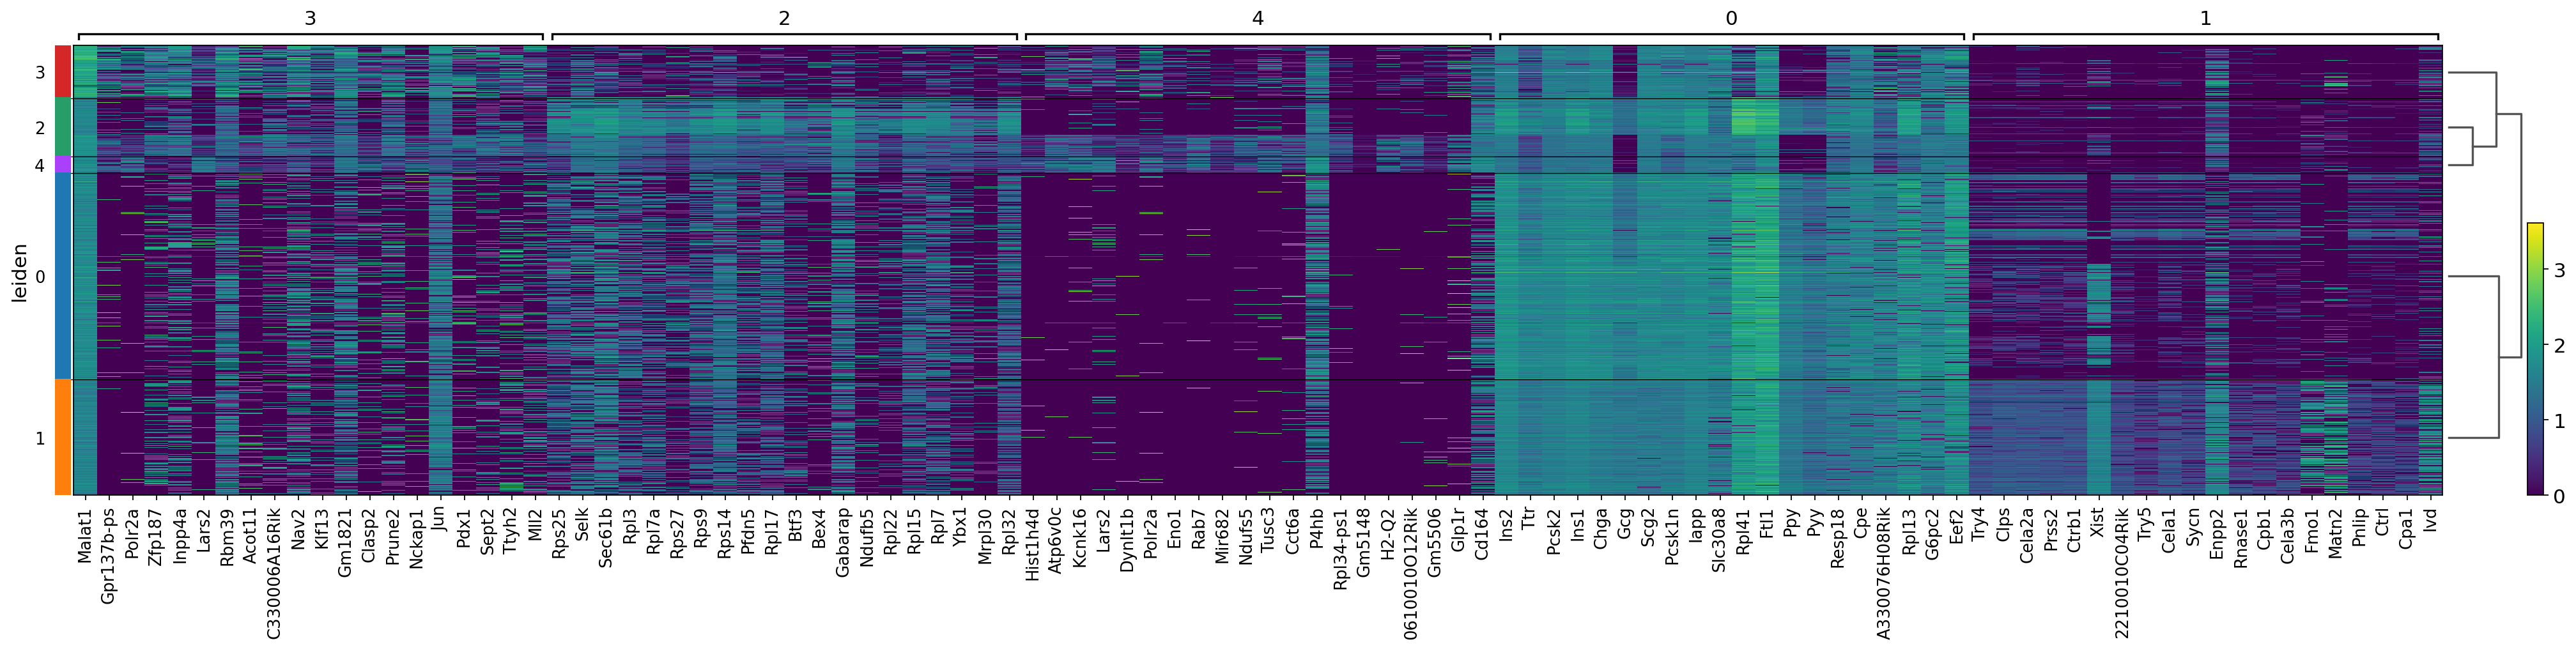

In [ ]:
sc.pl.rank_genes_groups_heatmap(B, n_genes=20, show_gene_labels = True ) #computing a heatmap of the gene expression of cells for top 20 marker genes

**Comparision of the marker genes between the clusters**

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


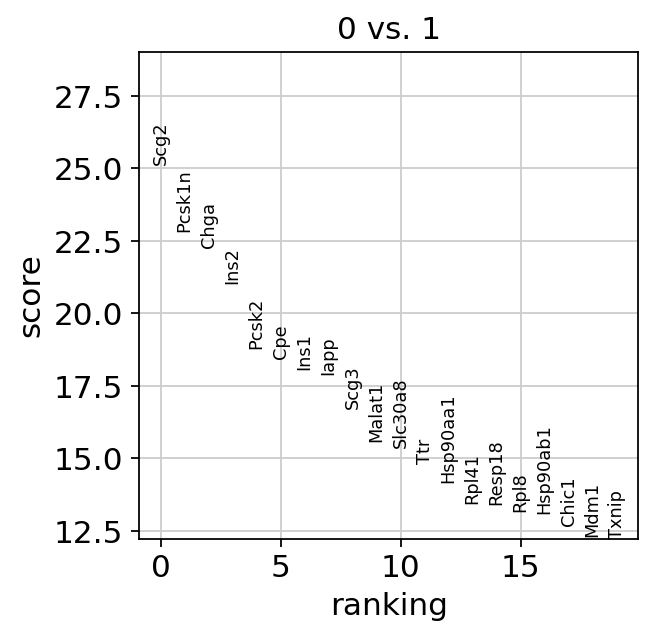

In [ ]:
#computing the marker genes which can differentiate one cluster from one or many clusters
sc.tl.rank_genes_groups(B, groupby='leiden',groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(B,groups=['0'])

Pcsk1n is most the most differentially expressed gene between cells in cluster 0 and cells in cluster 1

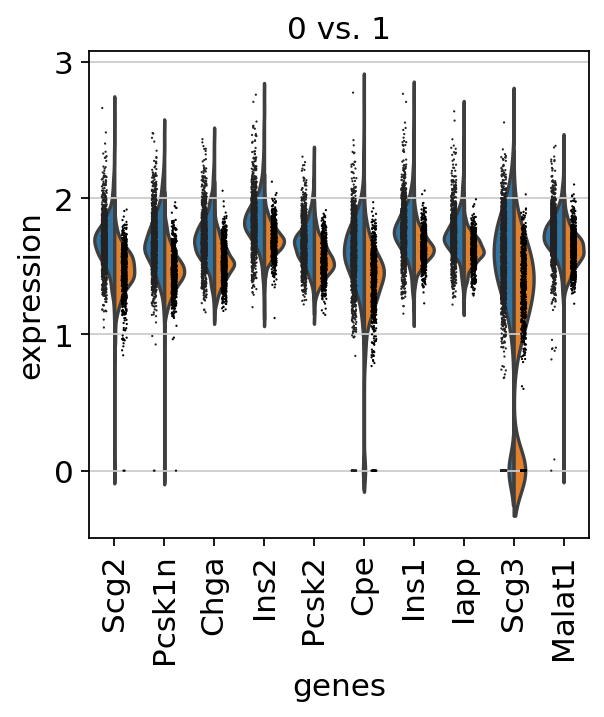

In [ ]:
sc.pl.rank_genes_groups_violin(B, n_genes=10) #visualisation of the marker genes in cluster 0 and cluster 1

**GENE TYPE ANNOTATION** : The pancreatic B cells are classified into different functional groups which was found via literature and is compiled in the following link https://docs.google.com/spreadsheets/d/1777xyXtlWvHWO7IliFznMLvs-dTgCQLLw4XyxR0QdAw/edit?usp=sharing


In [ ]:
new_cluster_names = [
    'Insulin Processing', 'Acinar genes', 'Inhibits Cell Apoptosis', 'Perinatal β-Cell Proliferation', 'Transcription']
B.rename_categories('leiden', new_cluster_names) #labelling the clusters with function names 

Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


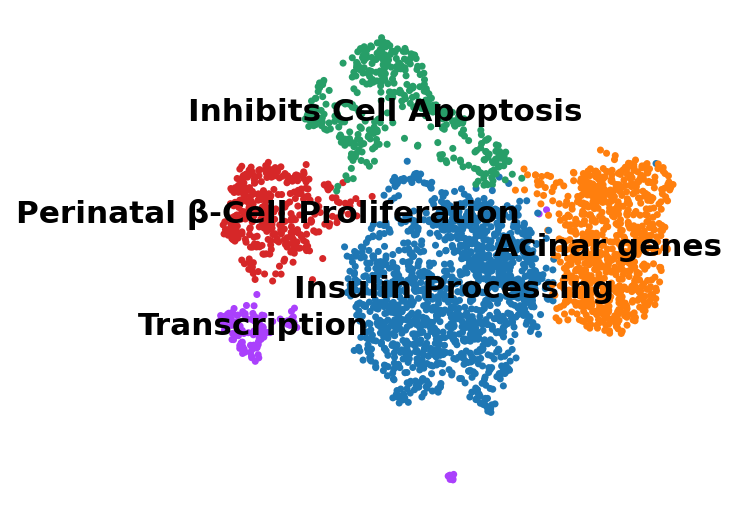

In [ ]:
sc.pl.umap(B, color='leiden', legend_loc='on data', title='', frameon=False) #plotting the labelled clusters using UMAP

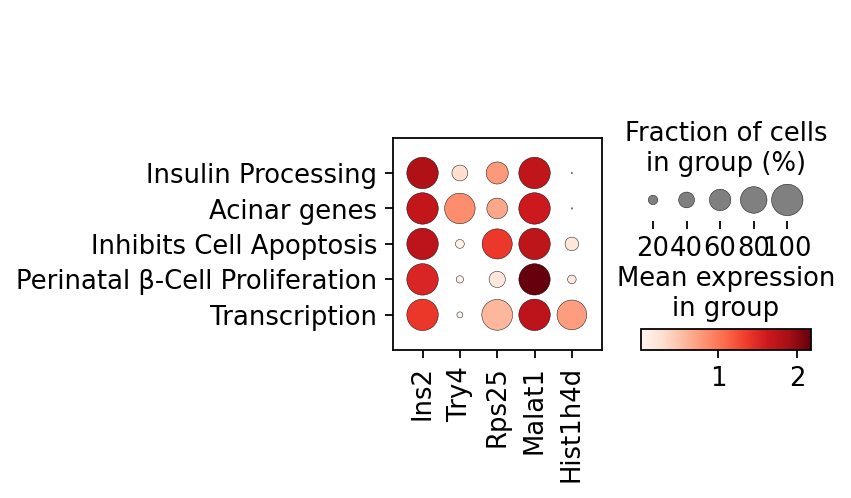

In [ ]:
sc.pl.dotplot(B, ['Ins2', 'Try4',	'Rps25',	'Malat1',	'Hist1h4d'], groupby='leiden'); #Visualisation through a scatter plot

We can infer 
<br>
Ins gene is prevalent in all the clusters but dominant in Insulin label
<br>
Try4 is prevalent in Acinar genes label
<br>
Rps25 is prevalent in Inhibits Cell Apoptosis label
<br>
Malat1 is prevalent in Perinatal β-Cell Proliferation label
<br>
Hist1h4d is prevalent in Transcription


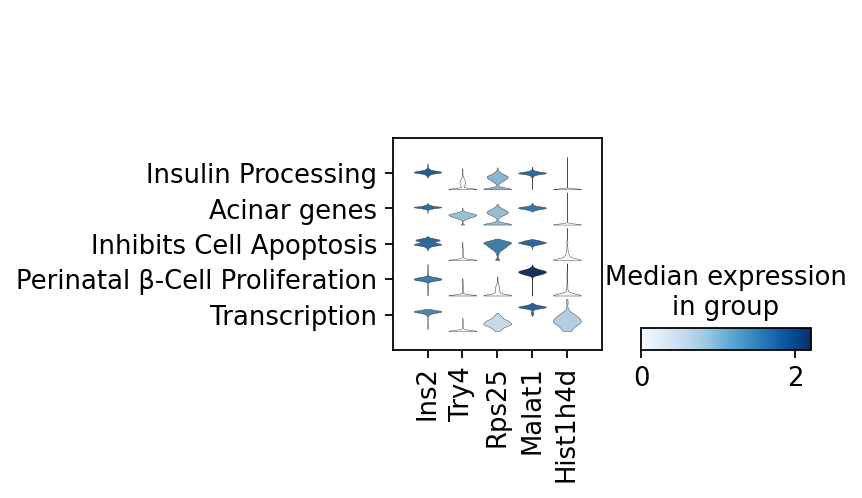

In [ ]:
sc.pl.stacked_violin(B, ['Ins2', 'Try4',	'Rps25',	'Malat1',	'Hist1h4d'], groupby='leiden', rotation=90); #Visualisation through a violin plot

We can infer 
<br>
Ins gene is prevalent in all the clusters but dominant in Insulin label
<br>
Try4 is prevalent in Acinar genes label
<br>
Rps25 is prevalent in Inhibits Cell Apoptosis label
<br>
Malat1 is prevalent in Perinatal β-Cell Proliferation label
<br>
Hist1h4d is prevalent in Transcription

In [ ]:
B #To inspect general info about the data

AnnData object with n_obs × n_vars = 2992 × 5530
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells-Droplet', 'means-Droplet', 'dispersions-Droplet', 'dispersions_norm-Droplet', 'highly_variable-Droplet', 'n_cells-FACS', 'means-FACS', 'dispersions-FACS', 'dispersions_norm-FACS', 'highly_variable-FACS', 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'cell_ontology_class_colors', 'hvg', 'leiden', 'leiden_colors', 'mouse.id_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', "dendrogram_['leiden']", 'dendrogram_leiden'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distan